# Unsupervised Learning -MLT Assignment 3  

Unsupervised Learning : uses machine learning (ML) algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns or data groupings.

# DATASETS USED

3 data sets have been used in this project

1)"Customer data.csv" is a dataset about Market Segmentation in Insurance

https://drive.google.com/file/d/11gF0VxvqCZ86ofe7TsevJK0S9PdGH-p5/view?usp=sharing

2)"bread basket.csv" is a bakery data with the list of items bought by customers.

https://drive.google.com/file/d/15Z5f9_BIhk-sIvfEU8keK9mW48NFCJx9/view?usp=sharing

3)"creditcard.csv" is a dataset that contains information on the transactions made using credit cards by European cardholders, in two particular days of September  2013

https://drive.google.com/file/d/1Vi_VT77CQfvVO8AwQsDf2CvkP7A-Rhu_/view?usp=drive_link


# TECHNIQUES USED

In [ ]:

1)K means clustering
2)Silhouette score
3)Anomaly detection
4)Apriori algorithm

In [ ]:
#Customer data.csv
'''
CUST_ID: Customer ID or identifier.
BALANCE: The current balance amount in the account.
BALANCE_FREQUENCY: How frequently the balance is updated, ranging from 0 to 1.
PURCHASES: Total amount of purchases made.
ONEOFF_PURCHASES: Total amount of one-off purchases (single purchases) made.
INSTALLMENTS_PURCHASES: Total amount of purchases made in installments.
CASH_ADVANCE: Total cash advance taken.
PURCHASES_FREQUENCY: How frequently purchases are made, ranging from 0 to 1.
ONEOFF_PURCHASES_FREQUENCY: How frequently one-off purchases are made, ranging from 0 to 1.
PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases are made in installments, ranging from 0 to 1.
CASH_ADVANCE_FREQUENCY: How frequently cash advances are taken, ranging from 0 to 1.
CASH_ADVANCE_TRX: Number of transactions made with cash advances.
PURCHASES_TRX: Number of purchase transactions.
CREDIT_LIMIT: Credit limit on the account.
PAYMENTS: Total amount of payments done.
MINIMUM_PAYMENTS: Minimum amount due on payments.
PRC_FULL_PAYMENT: Percentage of full payment made on the due amount.
TENURE: Number of months the account has been active.

'''

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('Customer Data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# filling mean value in place of missing values in the dataset

In [ ]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# drop CUST_ID column because it is not used

In [ ]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
Now read all columns name


In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [ ]:
#scaling
scalar=StandardScaler()

In [ ]:
scaled_df = scalar.fit_transform(df)

# dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0    -1.682218 -1.076454
1    -1.138286  2.506468
2     0.969704 -0.383505
3    -0.873631  0.043155
4    -1.599431 -0.688580
...        ...       ...
8945 -0.359634 -2.016146
8946 -0.564377 -1.639127
8947 -0.926208 -1.810787
8948 -2.336559 -0.657967
8949 -0.556421 -0.400456

[8950 rows x 2 columns]

# Hyperparameter tuning


# finding k by elbow method

Elbow Method : It is a method that plots the sum of squared error for a range of values of k.
If this plot looks like an arm, then k the value that resembles an elbow is selected. From this elbow value, sum of
squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.

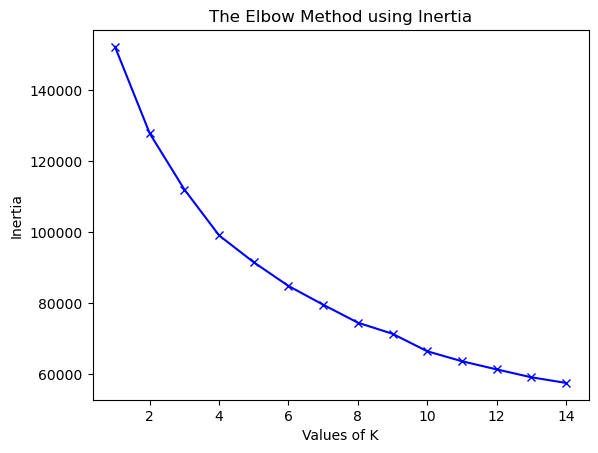

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
The elbow method works by plotting the WCSS for different values of k. As the number of clusters increases, the WCSS typically
decreases. This is because with more clusters, there is more flexibility to group data points together that are similar to each
other. However, at some point, increasing the number of clusters will not significantly decrease the WCSS.
This is the "elbow" of the graph.

The optimal number of clusters (k) is generally considered to be the value at the elbow. In the graph
it looks like the elbow point is at 4

# Model Building using KMeans

In [ ]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

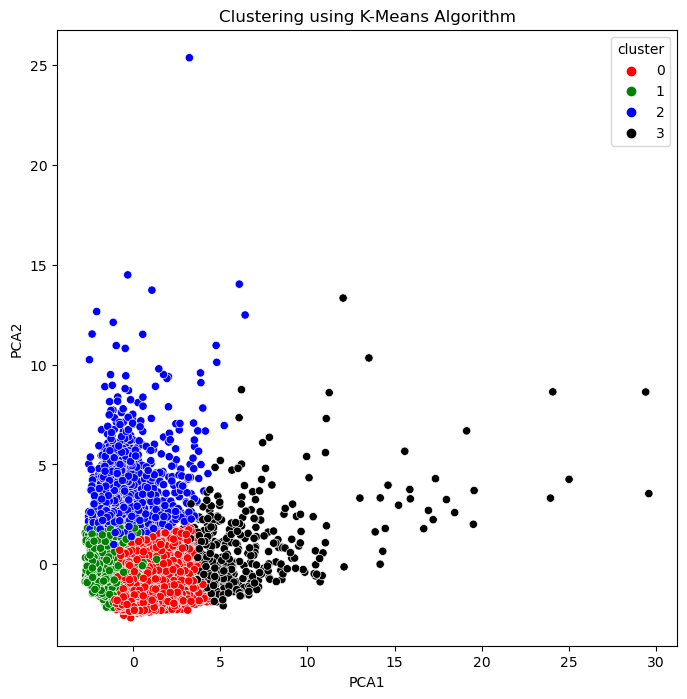

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

# find all cluster centers

In [ ]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

# inverse transform the data

In [ ]:
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0   897.456372          0.935846  1238.779285       595.851281   
1  1001.528209          0.788583   270.731977       209.468426   
2  4579.634667          0.968490   492.404081       313.228153   
3  3556.148177          0.986911  7680.432073      5099.738293   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             643.203117   211.260815            0.885991   
1              61.530909   588.078522            0.171857   
2             179.259744  4480.714056            0.284191   
3            2582.157195   686.680975            0.946548   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.297970                         0.712244   
1                   0.086346                         0.082117   
2                   0.136741                         0.183034   
3                   0.739667                         0.788577   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.042713         0.792610     22.133492  4217.363007   
1               0.113603         2.092420      2.923697  3270.170683   
2               0.482347        14.194559      7.539984  7505.733343   
3               0.073149         2.170732     89.309756  9711.097561   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1334.890105       651.454148         0.269643  11.597437  
1   969.563615       583.818511         0.078372  11.444976  
2  3452.619411      1994.585998         0.034840  11.385820  
3  7301.419079      1977.054411         0.286211  11.951220

# Creating a target column "Cluster" for storing the cluster segment

In [ ]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        864.206542          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        0  
89

In [ ]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     3202.467416           0.909091       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
23    3800.151377           0.818182    4248.35           3454.56   
24    5368.571219           1.000000       0.00              0.00   
28    7152.864372           1.000000     387.05            204.55   
...           ...                ...        ...               ...   
8857  2330.222764           1.000000    1320.00              0.00   
8858   812.934042           1.000000      50.00             50.00   
8869  2171.222526           1.000000     791.18            791.18   
8915   381.341657           1.000000      78.00              0.00   
8941  5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00   6442.945483             0.000000   
15                   1611.70   2301.491267             0.500000   
23                    793.79   7974.415626             1.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
...                      ...           ...                  ...   
8857                 1320.00  14926.790590             0.428571   
8858                    0.00   2185.500596             0.142857   
8869                    0.00   2056.602480             0.428571   
8915                   78.00    934.808869             1.000000   
8941                  214.55   8555.409326             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.000000                          0.000000   
15                      0.000000                          0.500000   
23                      0.083333                          0.916667   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
...                          ...                               ...   
8857                    0.000000                          0.285714   
8858                    0.142857                          0.000000   
8869                    0.428571                          0.000000   
8915                    0.000000                          0.833333   
8941                    0.000000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.250000                 4              0        7000.0   
15                  0.166667                 4             11        8000.0   
23                  0.333333                13             13        9000.0   
24                  0.363636                 4              0        6000.0   
28                  0.833333                16              8       10500.0   
...                      ...               ...            ...           ...   
8857                0.571429                10              3       10000.0   
8858                1.000000                16              1        3000.0   
8869                0.571429                 6              8        3000.0   
8915                0.666667                16              6        1000.0   
8941                0.666667                13              5        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1     4103.032597       1072.340217          0.222222      12        0  
15    1993.439277       2109.906490          0.000000      12        0  
23    9479.043842       1425.426525          0.000000      12        0  
24    1422.726707       1657.002877          0.000000      11        0  
28    1601.448347       1648.851345          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8857  8157.666434        283.362434          0.200000       7        0  
88

In [ ]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
8     1014.926473           1.000000     861.49            661.49   
9      152.225975           0.545455    1281.60           1281.60   
...           ...                ...        ...               ...   
8939   728.352548           1.000000     734.40            734.40   
8943     5.871712           0.500000      20.90             20.90   
8944   193.571722           0.833333    1012.73           1012.73   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       95.4      0.000000             0.166667   
3                        0.0    205.788017             0.083333   
4                        0.0      0.000000             0.083333   
8                      200.0      0.000000             0.333333   
9                        0.0      0.000000             0.166667   
...                      ...           ...                  ...   
8939                     0.0    239.891038             0.333333   
8943                     0.0      0.000000             0.166667   
8944                     0.0      0.000000             0.333333   
8948                     0.0     36.558778             0.000000   
8949                     0.0    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
8                       0.083333                          0.250000   
9                       0.166667                          0.000000   
...                          ...                               ...   
8939                    0.333333                          0.000000   
8943                    0.166667                          0.000000   
8944                    0.333333                          0.000000   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
8                   0.000000                 0              5        7000.0   
9                   0.000000                 0              3       11000.0   
...                      ...               ...            ...           ...   
8939                0.166667                 2              2        1000.0   
8943                0.000000                 0              1         500.0   
8944                0.000000                 0              2        4000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787              0.00      12        1  
3        0.000000        864.206542              0.00      12        1  
4      678.334763        244.791237              0.00      12        1  
8      688.278568        311.963409              0.00      12        1  
9     1164.770591        100.302262              0.00      12        1  
...           ...               ...               ...     ...      ...  
8939    72.530037        110.950798              0.00       6        1  
89

In [ ]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     3202.467416           0.909091       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
23    3800.151377           0.818182    4248.35           3454.56   
24    5368.571219           1.000000       0.00              0.00   
28    7152.864372           1.000000     387.05            204.55   
...           ...                ...        ...               ...   
8857  2330.222764           1.000000    1320.00              0.00   
8858   812.934042           1.000000      50.00             50.00   
8869  2171.222526           1.000000     791.18            791.18   
8915   381.341657           1.000000      78.00              0.00   
8941  5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00   6442.945483             0.000000   
15                   1611.70   2301.491267             0.500000   
23                    793.79   7974.415626             1.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
...                      ...           ...                  ...   
8857                 1320.00  14926.790590             0.428571   
8858                    0.00   2185.500596             0.142857   
8869                    0.00   2056.602480             0.428571   
8915                   78.00    934.808869             1.000000   
8941                  214.55   8555.409326             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.000000                          0.000000   
15                      0.000000                          0.500000   
23                      0.083333                          0.916667   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
...                          ...                               ...   
8857                    0.000000                          0.285714   
8858                    0.142857                          0.000000   
8869                    0.428571                          0.000000   
8915                    0.000000                          0.833333   
8941                    0.000000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.250000                 4              0        7000.0   
15                  0.166667                 4             11        8000.0   
23                  0.333333                13             13        9000.0   
24                  0.363636                 4              0        6000.0   
28                  0.833333                16              8       10500.0   
...                      ...               ...            ...           ...   
8857                0.571429                10              3       10000.0   
8858                1.000000                16              1        3000.0   
8869                0.571429                 6              8        3000.0   
8915                0.666667                16              6        1000.0   
8941                0.666667                13              5        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1     4103.032597       1072.340217          0.222222      12        2  
15    1993.439277       2109.906490          0.000000      12        2  
23    9479.043842       1425.426525          0.000000      12        2  
24    1422.726707       1657.002877          0.000000      11        2  
28    1601.448347       1648.851345          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8857  8157.666434        283.362434          0.200000       7        2  
88

In [ ]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6      627.260806           1.000000    7091.01           6402.63   
21    6369.531318           1.000000    6359.95           5910.04   
57    2386.330629           1.000000    5217.62           4789.09   
84    1935.362486           1.000000    4915.60           4515.34   
90    9381.255094           1.000000    5100.07           1147.83   
...           ...                ...        ...               ...   
8215  4436.557694           1.000000    6005.90           5838.38   
8541  3326.323283           1.000000    8209.77           2218.28   
8662   599.909949           1.000000    4947.32           3149.59   
8689   368.318662           0.909091    8053.95           8053.95   
8737  2533.618119           0.909091    5633.83           2985.92   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38      0.000000             1.000000   
21                    449.91    229.028245             1.000000   
57                    428.53      0.000000             0.916667   
84                    400.26    293.844792             1.000000   
90                   3952.24    370.737197             1.000000   
...                      ...           ...                  ...   
8215                  167.52    567.971877             1.000000   
8541                 5991.49      0.000000             1.000000   
8662                 1797.73      0.000000             1.000000   
8689                    0.00      0.000000             0.833333   
8737                 2647.91   2451.807788             0.916667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                       1.000000                          1.000000   
21                      0.916667                          1.000000   
57                      0.916667                          0.500000   
84                      1.000000                          0.333333   
90                      0.250000                          0.916667   
...                          ...                               ...   
8215                    0.583333                          0.916667   
8541                    0.416667                          1.000000   
8662                    1.000000                          0.916667   
8689                    0.833333                          0.000000   
8737                    0.500000                          0.750000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                   0.000000                 0             64       13500.0   
21                  0.333333                 6             92       11250.0   
57                  0.000000                 0             42        7500.0   
84                  0.083333                 1             50        9000.0   
90                  0.083333                 1             46        9000.0   
...                      ...               ...            ...           ...   
8215                0.083333                 1             61       10500.0   
8541                0.000000                 0            130       10000.0   
8662                0.000000                 0             73        3000.0   
8689                0.000000                 0             46        2000.0   
8737                0.333333                16             82        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
6     6354.314328        198.065894          1.000000      12        3  
21    2077.959051       1659.775075          0.000000      12        3  
57    5678.729613       1311.514878          0.083333      12        3  
84    4921.066897        594.756686          0.000000      12        3  
90    6409.496345       9827.045323          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8215  1650.425296       1067.515656          0.000000      12        3  
85

<Axes: xlabel='Cluster', ylabel='count'>

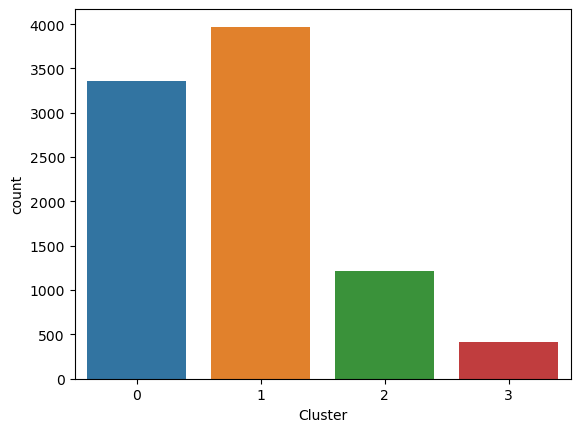

In [ ]:
sns.countplot(x='Cluster', data=cluster_df)

cluster 1 has the largest count

In [ ]:
df.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
#Saving the kmeans clustering model and the data with cluster label

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [ ]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Silhoutette score

In [ ]:
Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered
with other data points that are similar to each other. This score is calculated using the distance formula and the k value with
highest score is selected for modeling.

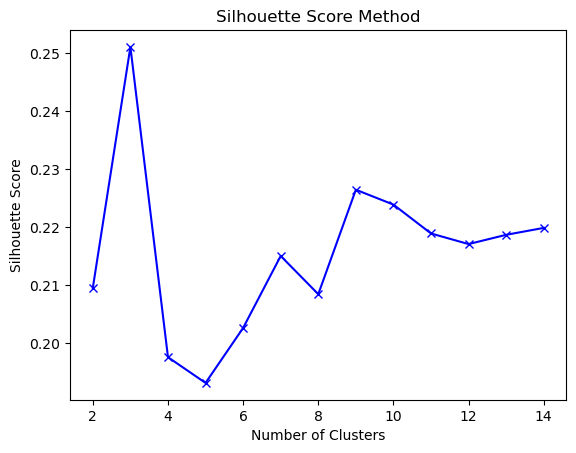

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

range_val = range(2, 15)  # Since silhouette score requires at least 2 clusters
for i in range_val:
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(pd.DataFrame(scaled_df))
    silhouette_avg = silhouette_score(pd.DataFrame(scaled_df), cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_val, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [ ]:
A silhouette score for each data point is calculated, ranging from -1 to 1. A score of 1 means the point is well-matched to
its cluster and poorly matched to points in other clusters. A score of 0 means the point is on the border between two clusters,
and a score of -1 means the point has been assigned to the wrong cluster.

In the graph above the silhouette scores are all very low. Scores this low generally indicate that the data points
aren’t well-clustered.

In [ ]:
cluster_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

# APRIORI ALGORITHM


In [ ]:
#bread basket.csv
'''
Transaction: Transaction number or identifier.
Item: The item purchased during the transaction.
date_time: Date and time of the transaction.
period_day: Indicates the period of the day when the transaction occurred, such as morning, afternoon, or evening.
weekday_weekend: Indicates whether the transaction occurred on a weekday or weekend.
'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [ ]:
df = pd.read_csv("bread basket.csv")

In [ ]:
df.head()

Transaction           Item         date_time period_day weekday_weekend
0            1          Bread  30-10-2016 09:58    morning         weekend
1            2   Scandinavian  30-10-2016 10:05    morning         weekend
2            2   Scandinavian  30-10-2016 10:05    morning         weekend
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend
4            3            Jam  30-10-2016 10:07    morning         weekend

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


There is no missing value.

In [ ]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df.head(10)

Transaction           Item           date_time period_day weekday_weekend
0            1          Bread 2016-10-30 09:58:00    morning         weekend
1            2   Scandinavian 2016-10-30 10:05:00    morning         weekend
2            2   Scandinavian 2016-10-30 10:05:00    morning         weekend
3            3  Hot chocolate 2016-10-30 10:07:00    morning         weekend
4            3            Jam 2016-10-30 10:07:00    morning         weekend
5            3        Cookies 2016-10-30 10:07:00    morning         weekend
6            4         Muffin 2016-10-30 10:08:00    morning         weekend
7            5         Coffee 2016-10-30 10:13:00    morning         weekend
8            5         Pastry 2016-10-30 10:13:00    morning         weekend
9            5          Bread 2016-10-30 10:13:00    morning         weekend

In [ ]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [ ]:
df.head()

Transaction           Item period_day weekday_weekend        date  \
0            1          Bread    morning         weekend  2016-10-30   
1            2   Scandinavian    morning         weekend  2016-10-30   
2            2   Scandinavian    morning         weekend  2016-10-30   
3            3  Hot chocolate    morning         weekend  2016-10-30   
4            3            Jam    morning         weekend  2016-10-30   

       time    month   hour weekday  
0  09:58:00  October   9-10  Sunday  
1  10:05:00  October  10-11  Sunday  
2  10:05:00  October  10-11  Sunday  
3  10:07:00  October  10-11  Sunday  
4  10:07:00  October  10-11  Sunday

In [ ]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [ ]:
df.head()

Transaction           Item period_day weekday_weekend        date  \
0            1          bread    morning         weekend  2016-10-30   
1            2   scandinavian    morning         weekend  2016-10-30   
2            2   scandinavian    morning         weekend  2016-10-30   
3            3  hot chocolate    morning         weekend  2016-10-30   
4            3            jam    morning         weekend  2016-10-30   

       time    month   hour weekday  
0  09:58:00  October   9-10  Sunday  
1  10:05:00  October  10-11  Sunday  
2  10:05:00  October  10-11  Sunday  
3  10:07:00  October  10-11  Sunday  
4  10:07:00  October  10-11  Sunday

# DATA VISUALISATION

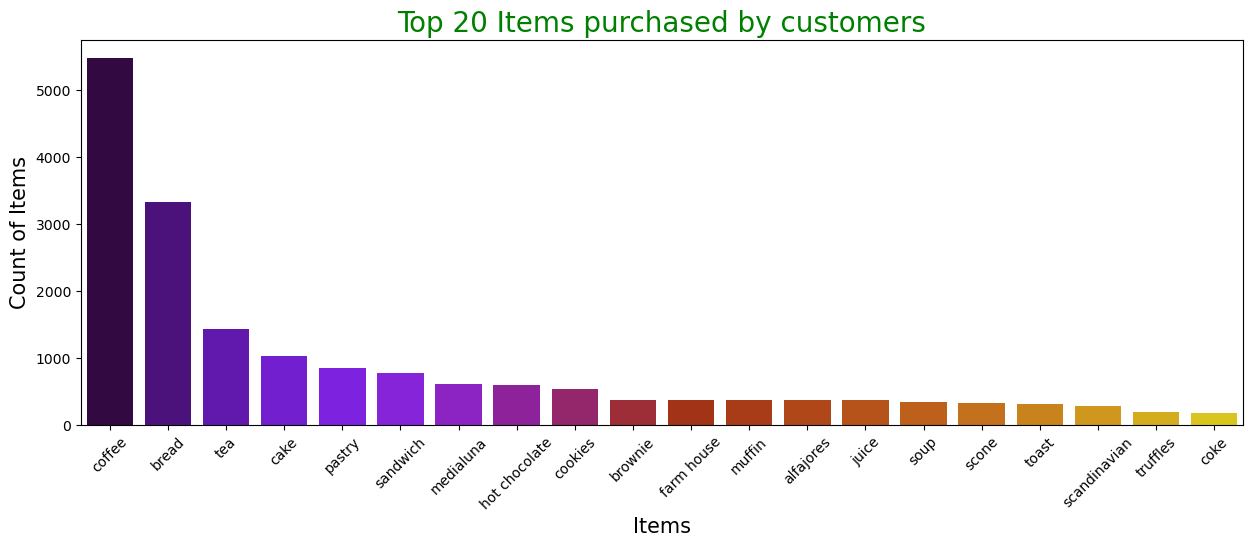

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

Coffee has the highest transactions.

Coke is the 20th most buyed product.

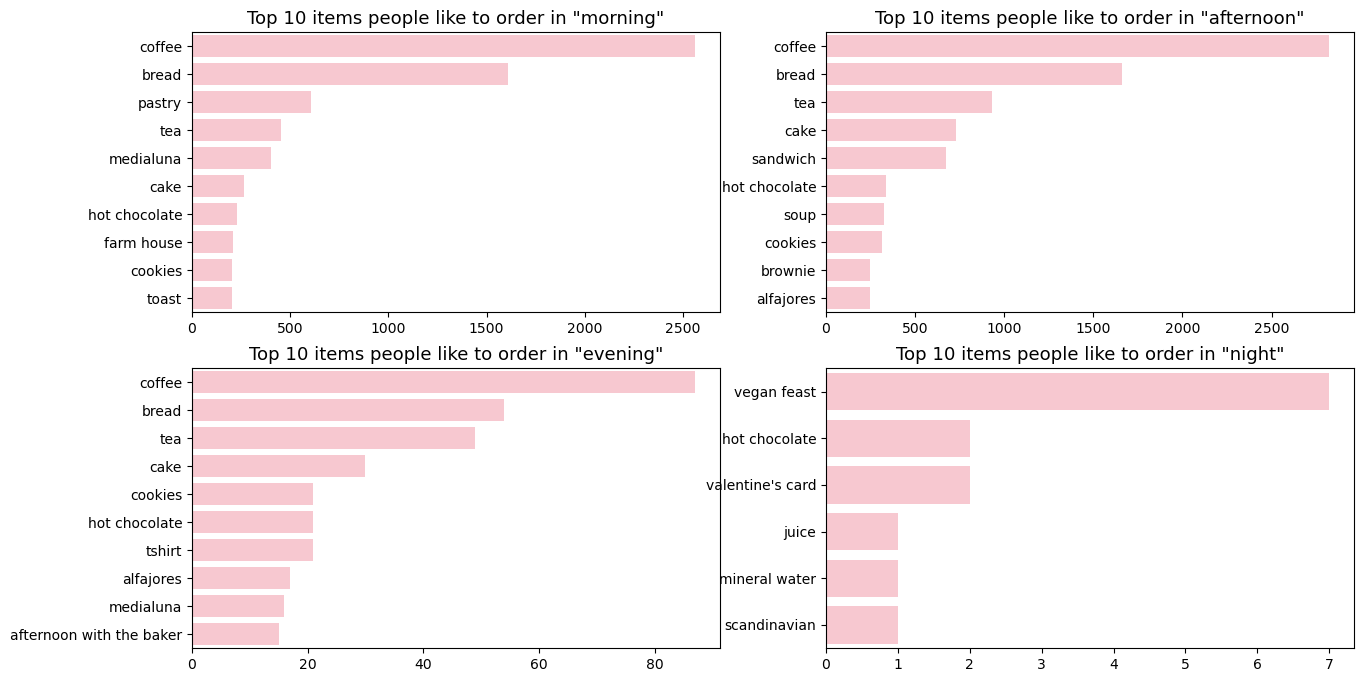

In [ ]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

Transaction           Item  Count
0                1          bread      1
1                2   scandinavian      2
2                3        cookies      1
3                3  hot chocolate      1
4                3            jam      1
...            ...            ...    ...
18882         9682   tacos/fajita      1
18883         9682            tea      1
18884         9683         coffee      1
18885         9683         pastry      1
18886         9684      smoothies      1

[18887 rows x 3 columns]

In [ ]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item         adjustment  afternoon with the baker  alfajores  argentina night  \
Transaction                                                                     
1                   0.0                       0.0        0.0              0.0   
2                   0.0                       0.0        0.0              0.0   
3                   0.0                       0.0        0.0              0.0   
4                   0.0                       0.0        0.0              0.0   
5                   0.0                       0.0        0.0              0.0   

Item         art tray  bacon  baguette  bakewell  bare popcorn  basket  ...  \
Transaction                                                             ...   
1                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
2                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
3                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
4                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
5                 0.0    0.0       0.0       0.0           0.0     0.0  ...   

Item         the bart  the nomad  tiffin  toast  truffles  tshirt  \
Transaction                                                         
1                 0.0        0.0     0.0    0.0       0.0     0.0   
2                 0.0        0.0     0.0    0.0       0.0     0.0   
3                 0.0        0.0     0.0    0.0       0.0     0.0   
4                 0.0        0.0     0.0    0.0       0.0     0.0   
5                 0.0        0.0     0.0    0.0       0.0     0.0   

Item         valentine's card  vegan feast  vegan mincepie  victorian sponge  
Transaction                                                                   
1                         0.0          0.0             0.0               0.0  
2                         0.0          0.0             0.0               0.0  
3                         0.0          0.0             0.0               0.0  
4                         0.0          0.0             0.0               0.0  
5                         0.0          0.0             0.0               0.0  

[5 rows x 94 columns]

In [ ]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item         adjustment  afternoon with the baker  alfajores  argentina night  \
Transaction                                                                     
1                     0                         0          0                0   
2                     0                         0          0                0   
3                     0                         0          0                0   
4                     0                         0          0                0   
5                     0                         0          0                0   

Item         art tray  bacon  baguette  bakewell  bare popcorn  basket  ...  \
Transaction                                                             ...   
1                   0      0         0         0             0       0  ...   
2                   0      0         0         0             0       0  ...   
3                   0      0         0         0             0       0  ...   
4                   0      0         0         0             0       0  ...   
5                   0      0         0         0             0       0  ...   

Item         the bart  the nomad  tiffin  toast  truffles  tshirt  \
Transaction                                                         
1                   0          0       0      0         0       0   
2                   0          0       0      0         0       0   
3                   0          0       0      0         0       0   
4                   0          0       0      0         0       0   
5                   0          0       0      0         0       0   

Item         valentine's card  vegan feast  vegan mincepie  victorian sponge  
Transaction                                                                   
1                           0            0               0                 0  
2                           0            0               0                 0  
3                           0            0               0                 0  
4                           0            0               0                 0  
5                           0            0               0                 0  

[5 rows x 94 columns]

In [ ]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

C:\Users\Neha Mathew\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                 itemsets
0   0.036344              (alfajores)
1   0.016059               (baguette)
2   0.327205                  (bread)
3   0.040042                (brownie)
4   0.103856                   (cake)
..       ...                      ...
56  0.023666          (coffee, toast)
57  0.014369          (tea, sandwich)
58  0.010037    (coffee, bread, cake)
59  0.011199  (coffee, pastry, bread)
60  0.010037      (cake, coffee, tea)

[61 rows x 2 columns]

In [ ]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

antecedents       consequents  antecedent support  \
31           (toast)          (coffee)            0.033597   
29  (spanish brunch)          (coffee)            0.018172   
19       (medialuna)          (coffee)            0.061807   
23          (pastry)          (coffee)            0.086107   
1        (alfajores)          (coffee)            0.036344   
17           (juice)          (coffee)            0.038563   
25        (sandwich)          (coffee)            0.071844   
6             (cake)          (coffee)            0.103856   
27           (scone)          (coffee)            0.034548   
13         (cookies)          (coffee)            0.054411   
15   (hot chocolate)          (coffee)            0.058320   
5          (brownie)          (coffee)            0.040042   
21          (muffin)          (coffee)            0.038457   
2           (pastry)           (bread)            0.086107   
10            (cake)             (tea)            0.103856   
39     (coffee, tea)            (cake)            0.049868   
33        (sandwich)             (tea)            0.071844   
9    (hot chocolate)            (cake)            0.058320   
38    (cake, coffee)             (tea)            0.054728   
11             (tea)            (cake)            0.142631   
37          (pastry)   (coffee, bread)            0.086107   
36   (coffee, bread)          (pastry)            0.090016   
7           (coffee)            (cake)            0.478394   
34   (coffee, bread)            (cake)            0.090016   
8             (cake)   (hot chocolate)            0.103856   
32             (tea)        (sandwich)            0.142631   
22          (coffee)          (pastry)            0.478394   
40            (cake)     (coffee, tea)            0.103856   
35            (cake)   (coffee, bread)            0.103856   
3            (bread)          (pastry)            0.327205   
24          (coffee)        (sandwich)            0.478394   
18          (coffee)       (medialuna)            0.478394   
41             (tea)    (cake, coffee)            0.142631   
14          (coffee)   (hot chocolate)            0.478394   
12          (coffee)         (cookies)            0.478394   
30          (coffee)           (toast)            0.478394   
16          (coffee)           (juice)            0.478394   
4           (coffee)         (brownie)            0.478394   
0           (coffee)       (alfajores)            0.478394   
20          (coffee)          (muffin)            0.478394   
26          (coffee)           (scone)            0.478394   
28          (coffee)  (spanish brunch)            0.478394   

    consequent support   support  confidence      lift  leverage  conviction  \
31            0.478394  0.023666    0.704403  1.472431  0.007593    1.764582   
29            0.478394  0.010882    0.598837  1.251766  0.002189    1.300235   
19            0.478394  0.035182    0.569231  1.189878  0.005614    1.210871   
23            0.478394  0.047544    0.552147  1.154168  0.006351    1.164682   
1             0.478394  0.019651    0.540698  1.130235  0.002264    1.135648   
17            0.478394  0.020602    0.534247  1.116750  0.002154    1.119919   
25            0.478394  0.038246    0.532353  1.112792  0.003877    1.115384   
6             0.478394  0.054728    0.526958  1.101515  0.005044    1.102664   
27            0.478394  0.018067    0.522936  1.093107  0.001539    1.093366   
13            0.478394  0.028209    0.518447  1.083723  0.002179    1.083174   
15            0.478394  0.029583    0.507246  1.060311  0.001683    1.058553   
5             0.478394  0.019651    0.490765  1.025860  0.000495    1.024293   
21            0.478394  0.018806    0.489011  1.022193  0.000408    1.020777   
2             0.327205  0.029160    0.338650  1.034977  0.000985    1.017305   
10            0.142631  0.023772    0.228891  1.604781  0.008959    1.111865   
39            0.103856  0.010037    0.201271  1.937977  0.0048

In [ ]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

antecedents       consequents  antecedent support  \
31           (toast)          (coffee)            0.033597   
29  (spanish brunch)          (coffee)            0.018172   
19       (medialuna)          (coffee)            0.061807   
23          (pastry)          (coffee)            0.086107   
1        (alfajores)          (coffee)            0.036344   
17           (juice)          (coffee)            0.038563   
25        (sandwich)          (coffee)            0.071844   
6             (cake)          (coffee)            0.103856   
27           (scone)          (coffee)            0.034548   
13         (cookies)          (coffee)            0.054411   
15   (hot chocolate)          (coffee)            0.058320   
5          (brownie)          (coffee)            0.040042   
21          (muffin)          (coffee)            0.038457   
2           (pastry)           (bread)            0.086107   
10            (cake)             (tea)            0.103856   
39     (coffee, tea)            (cake)            0.049868   
33        (sandwich)             (tea)            0.071844   
9    (hot chocolate)            (cake)            0.058320   
38    (cake, coffee)             (tea)            0.054728   
11             (tea)            (cake)            0.142631   
37          (pastry)   (coffee, bread)            0.086107   
36   (coffee, bread)          (pastry)            0.090016   
7           (coffee)            (cake)            0.478394   
34   (coffee, bread)            (cake)            0.090016   
8             (cake)   (hot chocolate)            0.103856   
32             (tea)        (sandwich)            0.142631   
22          (coffee)          (pastry)            0.478394   
40            (cake)     (coffee, tea)            0.103856   
35            (cake)   (coffee, bread)            0.103856   
3            (bread)          (pastry)            0.327205   
24          (coffee)        (sandwich)            0.478394   
18          (coffee)       (medialuna)            0.478394   
41             (tea)    (cake, coffee)            0.142631   
14          (coffee)   (hot chocolate)            0.478394   
12          (coffee)         (cookies)            0.478394   
30          (coffee)           (toast)            0.478394   
16          (coffee)           (juice)            0.478394   
4           (coffee)         (brownie)            0.478394   
0           (coffee)       (alfajores)            0.478394   
20          (coffee)          (muffin)            0.478394   
26          (coffee)           (scone)            0.478394   
28          (coffee)  (spanish brunch)            0.478394   

    consequent support   support  confidence      lift  leverage  conviction  \
31            0.478394  0.023666    0.704403  1.472431  0.007593    1.764582   
29            0.478394  0.010882    0.598837  1.251766  0.002189    1.300235   
19            0.478394  0.035182    0.569231  1.189878  0.005614    1.210871   
23            0.478394  0.047544    0.552147  1.154168  0.006351    1.164682   
1             0.478394  0.019651    0.540698  1.130235  0.002264    1.135648   
17            0.478394  0.020602    0.534247  1.116750  0.002154    1.119919   
25            0.478394  0.038246    0.532353  1.112792  0.003877    1.115384   
6             0.478394  0.054728    0.526958  1.101515  0.005044    1.102664   
27            0.478394  0.018067    0.522936  1.093107  0.001539    1.093366   
13            0.478394  0.028209    0.518447  1.083723  0.002179    1.083174   
15            0.478394  0.029583    0.507246  1.060311  0.001683    1.058553   
5             0.478394  0.019651    0.490765  1.025860  0.000495    1.024293   
21            0.478394  0.018806    0.489011  1.022193  0.000408    1.020777   
2             0.327205  0.029160    0.338650  1.034977  0.000985    1.017305   
10            0.142631  0.023772    0.228891  1.604781  0.008959    1.111865   
39            0.103856  0.010037    0.201271  1.937977  0.0048

# ANOMALY DETECTION


In statistics and data analysis, an anomaly or outlier refers to a rare observation which deviates significantly from the majority of the data and does not conform to a well-defined notion of normal behaviour. It is possible that such observations may have been generated by a different mechanism or appear inconsistent with the remainder of the dataset. The process of identifying such observations is generally referred to as anomaly detection.

The dataset contains information on the transactions made using credit cards by European cardholders, in two particular days of September  2013


In [ ]:
# Loading the data
data = pd.read_csv('creditcard.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage         67.36 MB
Dataset shape    (284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# Train-Validation-Test Split

In [ ]:
# Splitting the data by target class
data_0, data_1 = data[data['Class'] == 0], data[data['Class'] == 1]

# Feature-target split
X_0, y_0 = data_0.drop('Class', axis = 1), data_0['Class']
X_1, y_1 = data_1.drop('Class', axis = 1), data_1['Class']

# Splitting the authentic class and constructing the training set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 40)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val_1, data_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Splitting the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 40)
data_val_2, data_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Merging data to construct the validation set and the test set
data_val, data_test = pd.concat([data_val_1, data_val_2], axis = 0), pd.concat([data_test_1, data_test_2], axis = 0)
X_val, y_val = data_val.drop('Class', axis = 1), data_val['Class']
X_test, y_test = data_test.drop('Class', axis = 1), data_test['Class']

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Train', 'Validation', 'Test']
values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(values=values_0, labels=labels, hole=0.5, textinfo='percent', title="Authentic"),
              row=1, col=1)
fig.add_trace(go.Pie(values=values_1, labels=labels, hole=0.5, textinfo='percent', title="Fraudulent"),
              row=1, col=2)

text_title = "Distribution of authentic and fraudulent transactions over training, validation, and test set"
fig.update_layout(height=500, width=800, showlegend=True, title=dict(text=text_title, x=0.5, y=0.95))

fig.show()


C:\Users\Neha Mathew\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Neha Mathew\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
# Setting the number of bins
bins_train = math.floor(len(X_train)**(1/3))

# Feature Engineering

# Time

In [ ]:
# Decomposing time
for df in [X_train, X_val, X_test]:
    df['Day'], temp = df['Time'] // (24*60*60), df['Time'] % (24*60*60)
    df['Hour'], temp = temp // (60*60), temp % (60*60)
    df['Minute'], df['Second'] = temp // 60, temp % 60
X_train[['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

Time  Day  Hour  Minute  Second
19594    30401.0  0.0   8.0    26.0    41.0
124712   77397.0  0.0  21.0    29.0    57.0
167920  118964.0  1.0   9.0     2.0    44.0
47377    43191.0  0.0  11.0    59.0    51.0
41731    40804.0  0.0  11.0    20.0     4.0

# Feature Selection

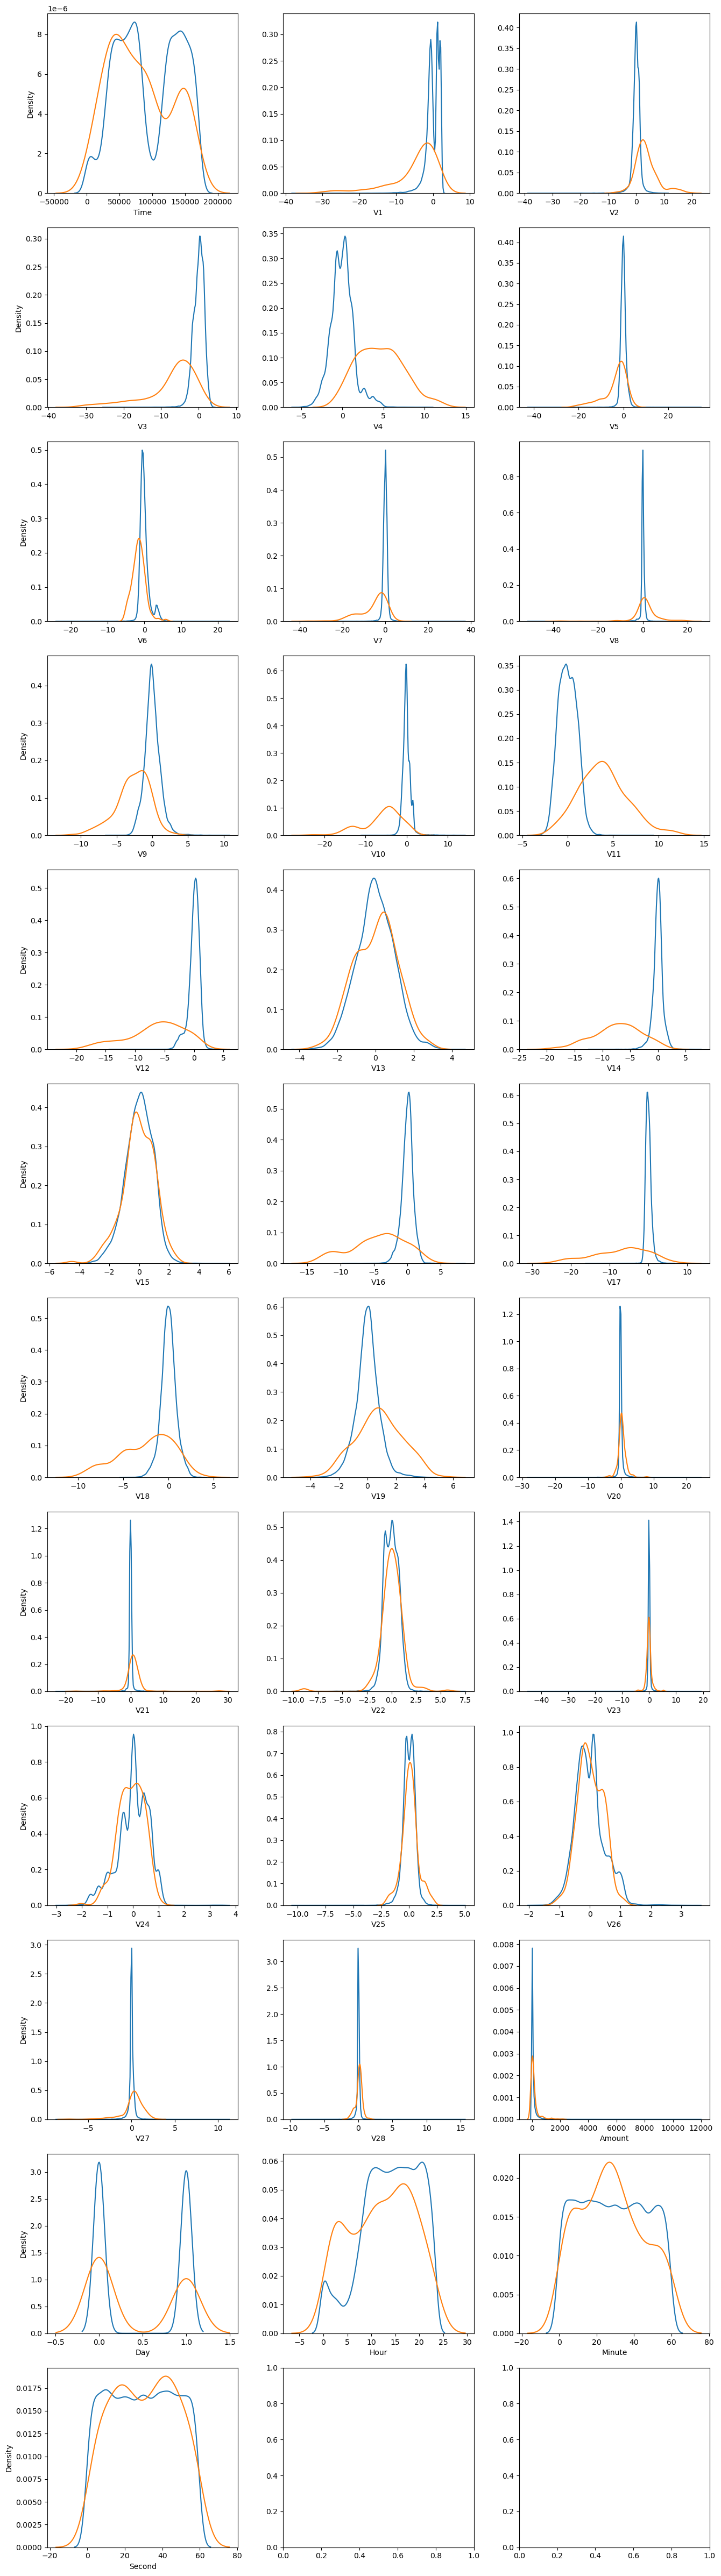

In [ ]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_val = pd.concat([X_val, y_val], axis=1)
data_val_0, data_val_1 = data_val[data_val['Class'] == 0], data_val[data_val['Class'] == 1]

cols, ncols = list(X_val.columns), 3
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(data_val_0[cols[i]], ax=ax[i // ncols, i % ncols])
    sns.kdeplot(data_val_1[cols[i]], ax=ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()


In [ ]:
# Feature selection
cols = ['V4', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Hour']
X_train_fs, X_val_fs, X_test_fs = X_train[cols], X_val[cols], X_test[cols]
X_train_fs.head()

V4       V11       V12       V14       V16       V17       V18  \
19594  -0.706232  2.027925  0.535822  0.250769  0.773615  0.449717 -1.963208   
124712  1.474933 -1.154523  0.263527  0.316174 -1.029415  1.030772 -0.438839   
167920  4.840766 -2.242431  0.034829 -0.546349 -0.070375  1.033695  0.531801   
47377   0.565273 -0.157045 -0.548790  0.419194  0.183518 -0.681323  0.911357   
41731  -0.428860 -0.580964 -0.609099 -0.187948  1.226723  0.104368 -0.995711   

             V19  Hour  
19594   0.613481   8.0  
124712  0.529080  21.0  
167920  1.215045   9.0  
47377   1.318132  11.0  
41731   0.420557  11.0

# Implementing Anomaly Detection

In [ ]:
# Normal pdf
def normal_density(x, mu, sigma):
    """
    Computes univariate normal probability density function (pdf) with mean mu, standard deviation sigma
    Args:
      x (scalar)    : input observation
      mu (scalar)   : mean
      sigma (scalar): standard deviation (> 0)
    Returns:
      f (scalar): value of the univariate normal pdf
    """
    assert sigma > 0, "Standard deviation must be positive"
    f = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (1 / 2) * ((x - mu) / sigma)**2)
    return f

In [ ]:
# Product of normal pdfs
def normal_product(x_vec, mu_vec, sigma_vec):
    """
    Computes product of univariate normal densities
    Args:
      x_vec (array_like, shape (n,))    : vector of input observations
      mu_vec (array_like, shape (n,))   : vector of means
      sigma_vec (array_like, shape (n,)): vector of standard deviations (> 0)
    Returns:
      f (scalar): product of univariate normal densities
    """
    assert min(sigma_vec) > 0, "Standard deviation must be positive"
    assert len(mu_vec) == len(x_vec), "Length of mean vector does not match length of input vector"
    assert len(sigma_vec) == len(x_vec), "Length of standard deviation vector does not match length of input vector"
    f = 1
    for i in range(len(x_vec)):
        f = f * normal_density(x_vec[i], mu_vec[i], sigma_vec[i])
    return f

In [ ]:
# Model fitting
mu_train, sigma_train = X_train_fs.mean().values, X_train_fs.std().values

In [ ]:
# Function to predict anomaly based on probability density threshold
def model_normal(X, epsilon):
    """
    Anomaly detection model
    Args:
      X (DataFrame, shape (m, n)): DataFrame of features
      epsilon (scalar)           : threshold density value (> 0)
    Returns:
      y (array_like, shape (m,)): predicted class labels
    """
    y = []
    for i in X.index:
        prob_density = normal_product(X.loc[i].tolist(), mu_train, sigma_train)
        y.append((prob_density < epsilon).astype(int))
    return y

# Threshold Tuning on Validation Set

In [ ]:
First, we construct some functions to compute and display the confusion matrix and to compute the  F2-score, given the true
labels and the predicted labels of the target

In [ ]:
# Function to compute confusion matrix
def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      confusion_mat (array): A 2D array representing a 2x2 confusion matrix
    """
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [ ]:
# Function to print confusion matrix
def conf_mat_heatmap(y_test, y_pred):
    """
    Prints confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      Nothing, prints a heatmap representing a 2x2 confusion matrix
    """
    confusion_mat = conf_mat(y_test, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()

In [ ]:
# Function to compute and return F2-score
def f2_score(y_test, y_pred):
    """
    Computes F2-score, given true and predicted binary (0 or 1) labels
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      f2 (float): F2-score obtained from y_test and y_pred
    """
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    f2 = (5 * tp) / ((5 * tp) + (4 * fn) + fp)
    return f2

We set a sequence of threshold values alpha:  0.001,0.002,⋯,0.05
 . These values are for the pdf of a single feature. The corresponding threshold for the joint probability density is alpha to the  n
 -th power, where  n
  is the number of features used in the model.

For each threshold, we compute the  F2
 -score to evaluate the model performance on the validation set. The validation  F2
 -score is plotted against the threshold alpha

In [ ]:
import itertools
import numpy as np  # Assuming you also need numpy

alpha_list, f2_list, f2_max, alpha_opt, y_val_pred_opt = [], [], 0.0, 0.0, np.zeros(len(y_val))
for alpha, j in itertools.product(np.arange(0.001, 0.051, 0.001), range(1)):
    y_val_pred = model_normal(X_val_fs, epsilon = alpha**X_val_fs.shape[1])
    f2 = f2_score(y_val, y_val_pred)
    alpha_list.append(alpha)
    f2_list.append(f2)
    if f2 > f2_max:
        alpha_opt = alpha
        y_val_pred_opt = y_val_pred
        f2_max = f2
y_val_pred = model_normal(X_val_fs, epsilon = alpha**X_val_fs.shape[1])
f2 = f2_score(y_val, y_val_pred)


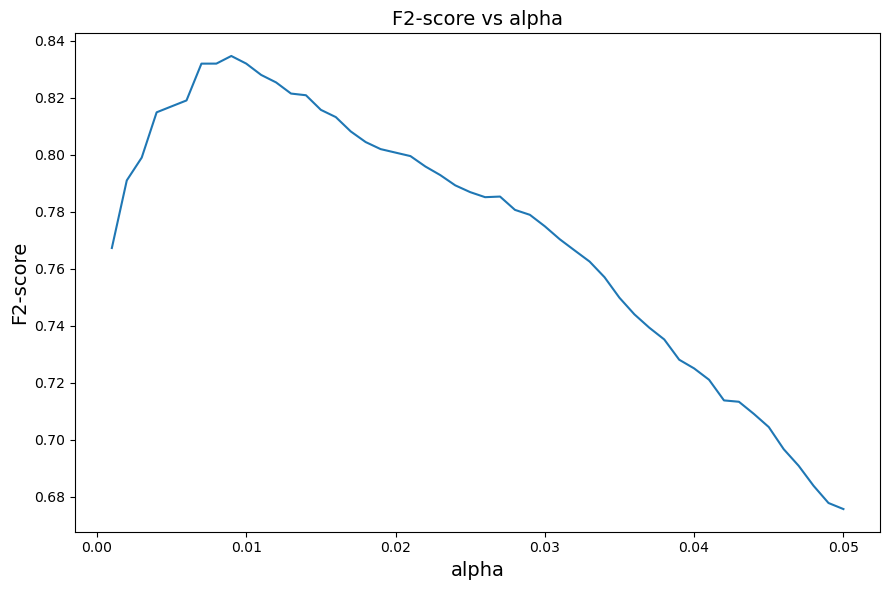

In [ ]:
# Plotting F2-score over alpha
plt.figure(figsize = (9, 6))
plt.plot(alpha_list, f2_list)
plt.xlabel("alpha", fontsize = 14)
plt.ylabel("F2-score", fontsize = 14)
plt.title("F2-score vs alpha", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Tuning summary
print(pd.Series({
    "Optimal alpha": alpha_opt,
    "Optimal F2-score": f2_score(y_val, y_val_pred_opt)
}).to_string())

Optimal alpha       0.009000
Optimal F2-score    0.834671


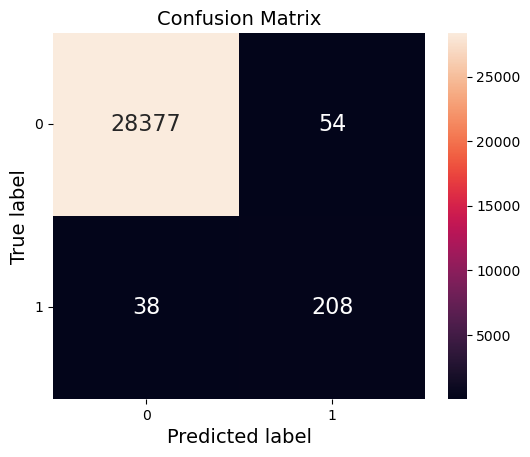

In [ ]:
# Confusion matrix for predictions on the validation set
conf_mat_heatmap(y_val, y_val_pred_opt)

# Prediction and Evaluation on Test Set

In [ ]:
# Function to compute and print evaluation metrics
def evaluation(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    print(pd.Series({
        "Accuracy": (tp + tn) / (tn + fp + fn + tp),
        "Precision": tp / (tp + fp),
        "Recall": tp / (tp + fn),
        "F1-score": (2 * tp) / ((2 * tp) + fn + fp),
        "F2-score": (5 * tp) / ((5 * tp) + (4 * fn) + fp),
        "MCC": ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    }).to_string())

In [ ]:
# Prediction and evaluation on the test set
y_test_normal = model_normal(X_test_fs, epsilon = alpha_opt**X_test_fs.shape[1])
evaluation(y_test, y_test_normal)

Accuracy       0.996687
Precision      0.798419
Recall         0.821138
F1-score       0.809619
F2-score       0.816492
MCC          171.242437


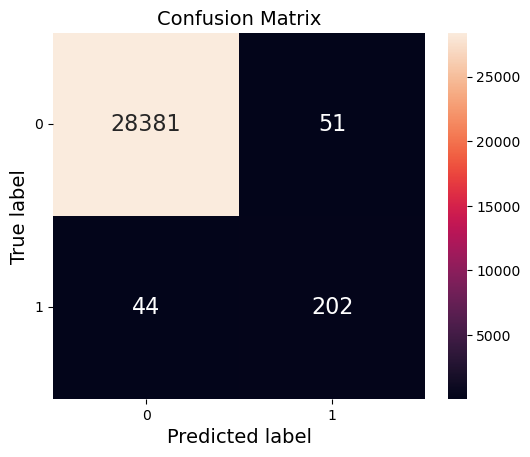

In [ ]:
# Confusion matrix for predictions on the test set
conf_mat_heatmap(y_test, y_test_normal)

To sum up, we observed that the data is heavily imbalanced with fraudulent transaction occurring rarely compared to authentic transactions. Also there are possibilities for fraudulent transactions to occur in completely new ways than before, making it difficult to train data on fraudulent transactions. Thus we build an anomaly detection system to find transactions, which are, in some sense, different from the usual observations.

Specifically, we have extracted Hour out of the Time feature and log-transformed (with a slight shift) the highly skewed Amount feature into Amount_transformed. Out of the  30 features (obtained after feature engineering), we have selected  9
 features which have significantly different distributions, for the different target classes: V4, V11, V12, V14, V16, V17, V18, V19 and Hour. Based on the training data, we fit a multivariate normal distribution (by estimating the vector of means and the vector of standard deviations, assuming statistical independence among the features.

Given a new transaction, if the corresponding density value of the fitted distribution is lower than a pre-specified threshold, then we flag the transaction as fraudulent. The choice of the threshold is optimized by iterating over a pre-specified set of values, predicting on the validation set, and evaluating the estimates by means of the  F2
 -score.